# Data Vectorization
In this notebook, the text data will be vectorized using different vectorization techniques. The most important ones used here are the **TF-IDF** and the **Word2Vec**. In the tf-idf, the vectorization will be tried using the unigrams, bigrams, trigrams, and the unigram-bigram combination as well. Then we will check which one is giving better categorization between the different categories.

This can be done by using the scatter plots of the data with the 4 categories as the legend. But since there are a lot of dimensions visualizing the plot is not possible. So the solution is reducing the number of dimensions using the TSNE or PCA techniques. PCA is used here as it is computationally easy. The PCA will be performed on the tf-idf and word2vec vectorized datasets.

Finally whichever is giving the best partition between the data, that will be finalized to proceed further.

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

----------------------

Here, for the word2vec model the zip file containing different word2vec models is downloaded. Among the models, the **glove.6B.300d.txt** model is used for the vectorization of the text data.

--------

In [2]:
# from zipfile import ZipFile
# file_name="glove.6B.zip"
# with ZipFile(file_name,'r') as zip_file:
#   zip_file.extractall()

In [3]:
w2v_dict = dict()
f = open('glove.6B.300d.txt', encoding='cp932', errors='ignore')
for line in f:
	values = line.split()
	word = values[0]
	vec = np.asarray(values[1:], dtype='float32')     
	w2v_dict[word] = vec
f.close()
print('Loaded %s word vectors.' % len(w2v_dict))
w2v_words =  set(w2v_dict.keys())

Loaded 399906 word vectors.


In [4]:
data = pd.read_csv('Cleaned_resumes.csv', index_col = 0)
data

,Category,Cleaned_text
0,PeopleSoft Developer,anubhav kumar singh core competency script she...
1,PeopleSoft Developer,profile summary year experience implement upgr...
2,PeopleSoft Developer,peoplesoft database administrator gangareddy p...
3,PeopleSoft Developer,classification internal classification interna...
4,PeopleSoft Developer,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Work_Day Developer,workday integration consultant name sri krishn...
75,Work_Day Developer,srikanth workday hcm consultant seek suitable ...
76,Work_Day Developer,workday hcm fcm name kumar role workday consul...
77,Work_Day Developer,venkateswarlu workday consultant year experien...


--------------

For different combinations of the labels, a particular name or phrase is given to identify that combination separately. This will make the output during the model deployment a lot more user friendly. Also a toxicity percentage for each unique label combination is generated. This could tell the user the toxicity percentage in a particular sentence.

--------------

In [5]:
data['Category'].value_counts()

React JS Developer      22
Work_Day Developer      21
PeopleSoft Developer    20
SQL Developer           16
Name: Category, dtype: int64

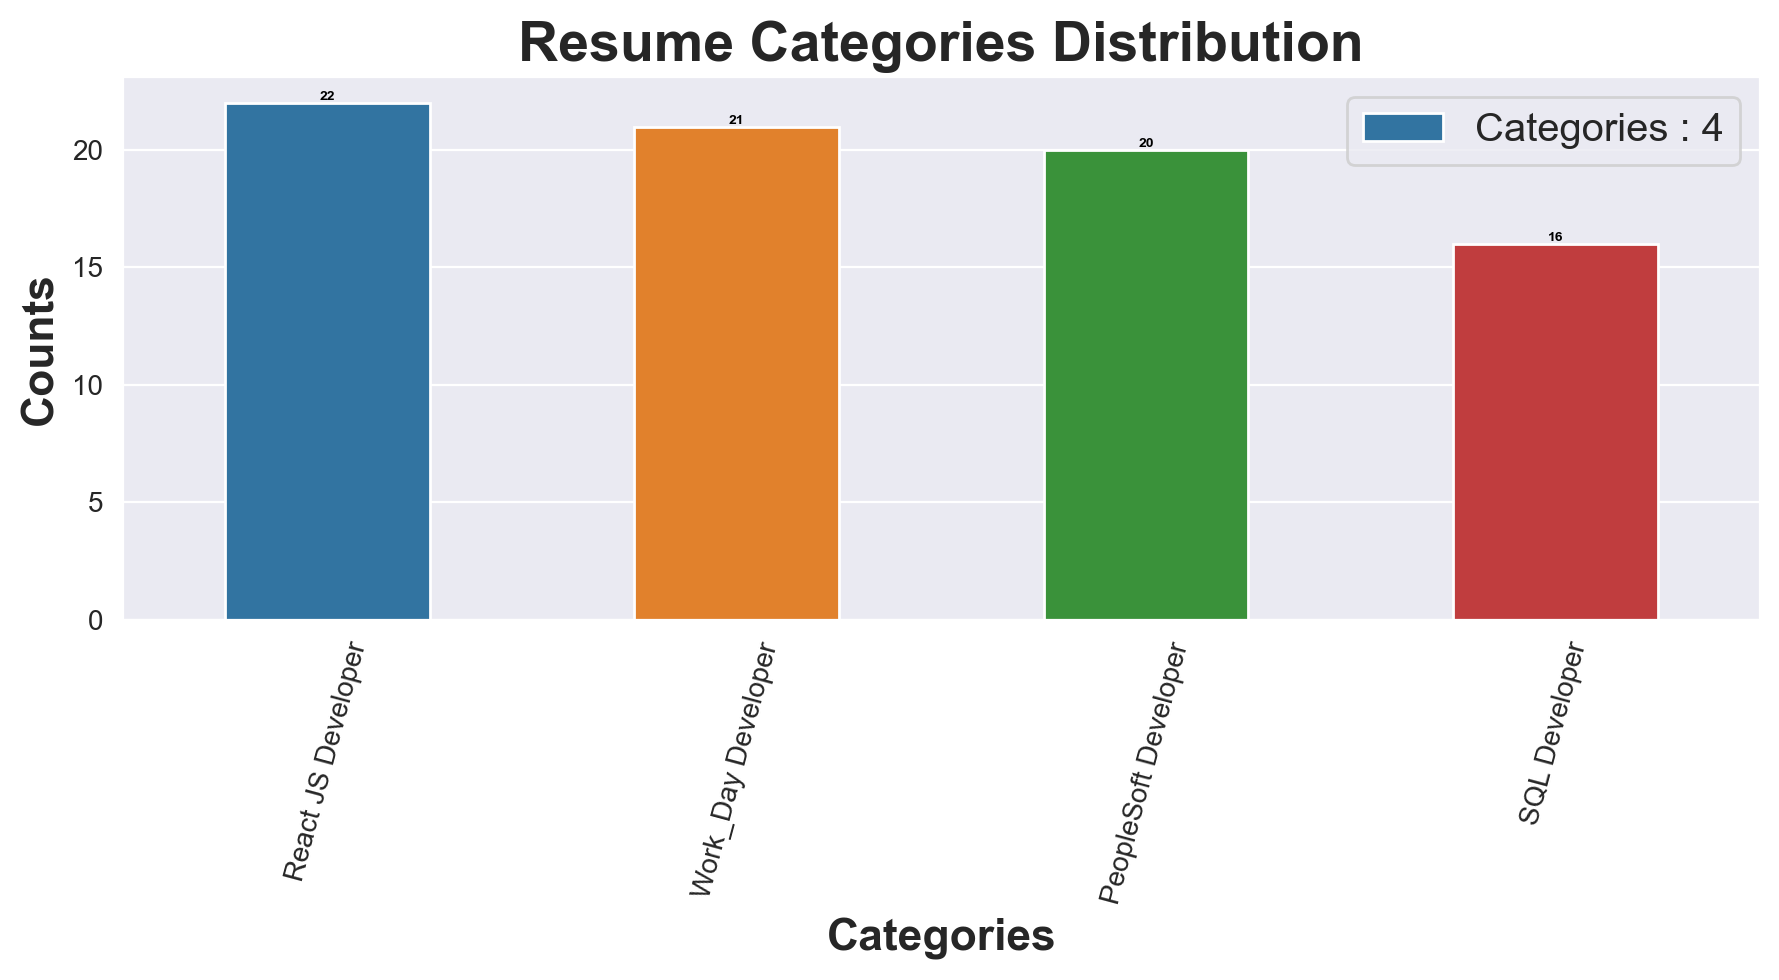

In [6]:
fig, axe = plt.subplots(1,1, figsize=(9,5), dpi=200)
ax = sns.barplot(x= data['Category'].value_counts().index, y= data['Category'].value_counts(), width=0.5,
                 data= data, ax= axe, label= 'Categories : {}'.format(len(data['Category'].unique())))

axe.set_xlabel('Categories', size=16,fontweight = 'bold')
axe.set_ylabel('Counts', size=16,fontweight = 'bold')
plt.xticks(rotation = 75)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Resume Categories Distribution', fontsize= 20, fontweight= 'bold')
rcParams = {'xtick.labelsize':'5','ytick.labelsize':'5','axes.labelsize':'5'}
for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 5)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

## Splitting the data into x and y

In [7]:
x = data['Cleaned_text']
y = data['Category']

In [8]:
y

0     PeopleSoft Developer
1     PeopleSoft Developer
2     PeopleSoft Developer
3     PeopleSoft Developer
4     PeopleSoft Developer
              ...         
74      Work_Day Developer
75      Work_Day Developer
76      Work_Day Developer
77      Work_Day Developer
78      Work_Day Developer
Name: Category, Length: 79, dtype: object

## Vectorization
There are two different approaches to vectorize the data. One is the **TF-IDF** and the other is the **Word2Vec**. These two techniques will be used here. After that which one gives the better result will be used during the model building

### 1. TF-IDF

In the **TF-IDF** method we can vectorize the text data by words or phrases which can called as unigrams for just each word vectorization and bigrams for a two word phrase vectorization and trigrams for three word phrase vectorization. Vectorization simply converts the count or importance of each word in a document. In this way it converts the words in all the documents in the corpus into numbers.

### 1.1 Unigram TF-IDF

In [9]:
unigram_tfidf = TfidfVectorizer(min_df=10,max_features=None,ngram_range=(1,1),stop_words='english')

In [10]:
import pickle
with open('unigram_tfidf.pkl', 'wb') as fin:
    pickle.dump(unigram_tfidf, fin)

In [11]:
x = x.apply(lambda x: str(x))

In [12]:
x_uni_tfidf = unigram_tfidf.fit_transform(x)

In [13]:
x_uni_tfidf_df = pd.DataFrame(x_uni_tfidf.toarray())

In [14]:
x_uni_tfidf_df.columns = unigram_tfidf.get_feature_names_out()

In [15]:
x_uni_tfidf_df

,ability,absence,academic,access,accord,account,achieve,achievement,active,activity,...,windows,work,workday,worker,workflow,write,writer,xml,xslt,year
0,0.000000,0.000000,0.0,0.087229,0.000000,0.000000,0.000000,0.000000,0.000000,0.040231,...,0.028029,0.094310,0.000000,0.000000,0.00000,0.028453,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.026795,0.000000,0.000000,0.062561,...,0.000000,0.009999,0.000000,0.000000,0.05218,0.000000,0.000000,0.000000,0.000000,0.010382
2,0.000000,0.000000,0.0,0.027281,0.000000,0.000000,0.000000,0.000000,0.030445,0.033553,...,0.070130,0.032177,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.011137
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.109886,0.080735,...,0.042187,0.025808,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.013398
4,0.029685,0.000000,0.0,0.041423,0.000000,0.000000,0.000000,0.043639,0.046227,0.101891,...,0.079862,0.097714,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.033819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.015414,0.046608,0.0,0.086037,0.069913,0.055285,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.177587,0.515998,0.098039,0.00000,0.028064,0.112816,0.069601,0.098039,0.017561
75,0.018198,0.192583,0.0,0.050786,0.000000,0.000000,0.000000,0.026752,0.000000,0.015615,...,0.000000,0.079867,0.478629,0.000000,0.00000,0.016566,0.044395,0.082168,0.069444,0.031098
76,0.000000,0.021228,0.0,0.019593,0.000000,0.016787,0.000000,0.000000,0.000000,0.012049,...,0.012592,0.146359,0.570747,0.053583,0.00000,0.000000,0.051383,0.095100,0.089304,0.007998
77,0.019089,0.057720,0.0,0.026637,0.000000,0.000000,0.000000,0.000000,0.000000,0.032761,...,0.017119,0.052363,0.547724,0.024282,0.00000,0.017377,0.069856,0.086194,0.097129,0.021747


In [16]:
x_uni_tfidf_df.to_csv('encoded_uni_tfidf.csv', index = False)

----------

Getting the top tf-idf values per class

-----

In [17]:
y

0     PeopleSoft Developer
1     PeopleSoft Developer
2     PeopleSoft Developer
3     PeopleSoft Developer
4     PeopleSoft Developer
              ...         
74      Work_Day Developer
75      Work_Day Developer
76      Work_Day Developer
77      Work_Day Developer
78      Work_Day Developer
Name: Category, Length: 79, dtype: object

In [18]:
y[y == 'PeopleSoft Developer'].index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')

In [19]:
top_tf_idf_val=[]
for val in y.unique():
    index=y[y == val].index
    filtered_data=x.loc[index]
    vec_data=unigram_tfidf.transform(filtered_data)
    vec_data=vec_data.A

    #finding the indices of top TF-IDF values across the output

    indices=np.dstack(np.unravel_index(np.argsort(vec_data.ravel()), vec_data.shape))[0][::-1]
    feat=unigram_tfidf.get_feature_names_out()
    avg_tf_idf_scores=dict()

    for index in indices:
        if feat[index[1]] in avg_tf_idf_scores:
            value=avg_tf_idf_scores[feat[index[1]]]
            value.append(vec_data[index[0]][index[1]])
            avg_tf_idf_scores[feat[index[1]]]=value
        else:
            avg_tf_idf_scores[feat[index[1]]]=[vec_data[index[0]][index[1]]]

    # TF-IDF value is not same for the same word. as it is depends on 
    #TF value and IDF value
    #TF value will change based on the input. so finding average TF-IDF value

    for key in avg_tf_idf_scores:

        value=np.array(avg_tf_idf_scores[key])
        avg_tf_idf_scores[key]= np.mean(value)

    avg_tf_idf_scores={k: v for k, v in sorted(avg_tf_idf_scores.items(),
                                    key=lambda item: item[1],reverse=True)}

    top_tf_idf_val.append((list(avg_tf_idf_scores.keys()),list(avg_tf_idf_scores.values())))

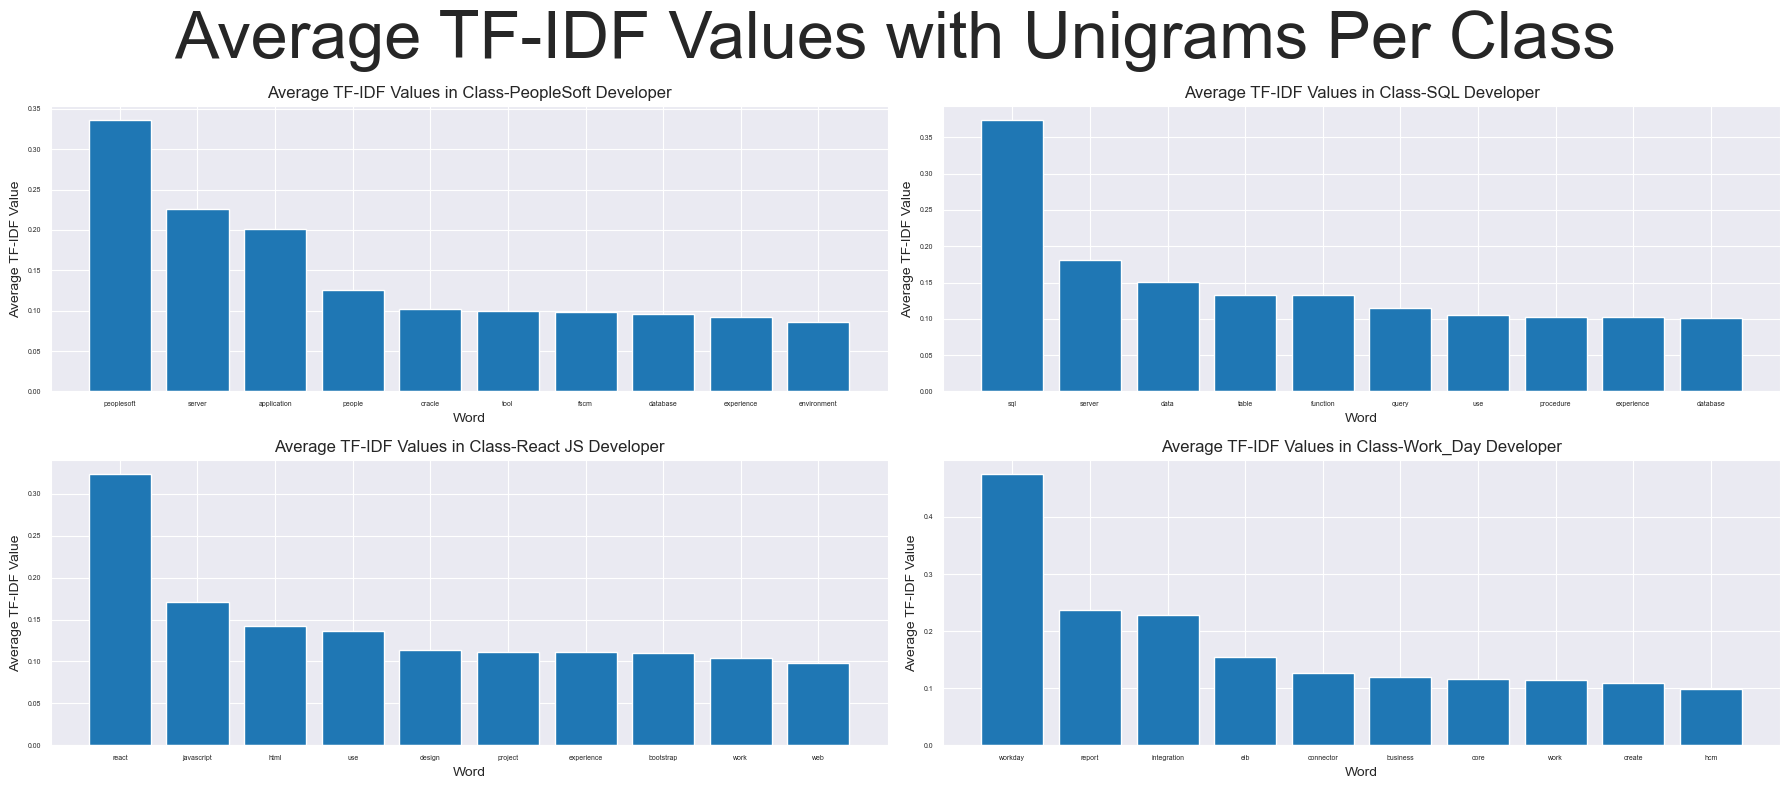

In [20]:
fig, axs = plt.subplots(2,2,figsize=(18,8))
fig.suptitle("Average TF-IDF Values with Unigrams Per Class",fontsize=48)
axs=axs.flatten()
for data,ax,col in zip(top_tf_idf_val,axs,y.unique()):
    words=data[0][:10]
    avg_tf_idf_value=data[1][:10]    
    rects1 = ax.bar(words, avg_tf_idf_value)
    ax.set_ylabel('Average TF-IDF Value')
    ax.set_xlabel("Word")
    ax.set_title('Average TF-IDF Values in Class-'+str(col))
fig.tight_layout()
plt.show()

-----------

From the above plots between the words and their tf-idf values for each category, we can see that some words are repeating in all the categories and have the same importance in all the categories.

Now we can look at the separation of the data points between the two main categories which are the **toxic and non-toxic**. Since there are a lot of dimensions after the vectorization we can use some dimensionality reduction techniques to reduce the data complexity. The TSNE model or the PCA model can be used here for this. The TSNE is a bit computationally expensive so, the PCA model can be used in this case.

Also, the y variable has multiple lables that should be converted to a single column.

----

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_enc = le.fit_transform(y)
y_enc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [22]:
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components = 2)

In [23]:
pca_values = pca.fit_transform(x_uni_tfidf)

In [24]:
pca_data = np.vstack((pca_values.T, y_enc)).T

In [25]:
pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2", "Label"))

<Axes: xlabel='Dim_1', ylabel='Dim_2'>

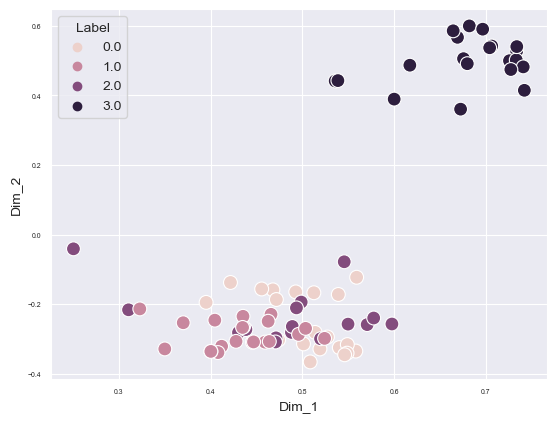

In [26]:
sns.scatterplot(data=pca_df,x='Dim_1',y='Dim_2',hue='Label',s = 100) 

------------

From the plot it can be seen that the four categories are grouped into separate clusters. But some overlapping between the points can be seen. This plot will tell us which vectorization technique will be highly successful in making the most accurate classification.

### 1.2 Bigram TF-IDF

In [27]:
bigram_tfidf = TfidfVectorizer(min_df=10,max_features=None,ngram_range=(2,2),stop_words='english')

In [28]:
x_bi_tfidf = bigram_tfidf.fit_transform(x)

In [29]:
x_bi_tfidf_df = pd.DataFrame(x_bi_tfidf.toarray())
x_bi_tfidf_df.columns = bigram_tfidf.get_feature_names_out()

In [30]:
x_bi_tfidf_df

,ability work,advance report,application designer,application engine,application server,application use,best knowledge,business need,business process,business requirement,...,work workday,workday consultant,workday hcm,workday integration,workday report,workday security,workday studio,xml xslt,xslt code,year experience
0,0.000000,0.000000,0.000000,0.000000,0.450601,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.067064,0.000000,0.467861,0.000000,0.055172,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040109
2,0.000000,0.000000,0.000000,0.000000,0.722594,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041298
3,0.000000,0.000000,0.066979,0.000000,0.467272,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040059
4,0.000000,0.000000,0.217234,0.000000,0.252585,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.056328,0.062861,0.000000,0.000000,0.000000,0.000000,0.000000,0.061028,0.141970,0.136701,...,0.051348,0.109936,0.201070,0.115562,0.125722,0.000000,0.329808,0.107382,0.059342,0.000000
75,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440074,0.094165,...,0.053056,0.170388,0.207757,0.179107,0.000000,0.064951,0.283980,0.110953,0.061315,0.032435
76,0.000000,0.000000,0.000000,0.133747,0.000000,0.043461,0.000000,0.047088,0.219081,0.105475,...,0.079238,0.169648,0.077570,0.000000,0.048502,0.048502,0.296883,0.082853,0.137360,0.024221
77,0.000000,0.064383,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.193876,0.093340,...,0.052591,0.056299,0.257421,0.236718,0.000000,0.128765,0.337791,0.109981,0.060778,0.064302


In [31]:
x_bi_tfidf_df.to_csv('encoded_bi_tfidf.csv', index = False)

----------

Getting the top tf-idf values per class

-----

In [32]:
top_tf_idf_val=[]
for val in y.unique():
    index=y[y == val].index
    filtered_data=x.loc[index]
    vec_data=bigram_tfidf.transform(filtered_data)
    vec_data=vec_data.A

    #finding the indices of top TF-IDF values across the output

    indices=np.dstack(np.unravel_index(np.argsort(vec_data.ravel()), vec_data.shape))[0][::-1]
    feat=bigram_tfidf.get_feature_names_out()
    avg_tf_idf_scores=dict()

    for index in indices:
        if feat[index[1]] in avg_tf_idf_scores:
            value=avg_tf_idf_scores[feat[index[1]]]
            value.append(vec_data[index[0]][index[1]])
            avg_tf_idf_scores[feat[index[1]]]=value
        else:
            avg_tf_idf_scores[feat[index[1]]]=[vec_data[index[0]][index[1]]]

    # TF-IDF value is not same for the same word. as it is depends on 
    #TF value and IDF value
    #TF value will change based on the input. so finding average TF-IDF value

    for key in avg_tf_idf_scores:

        value=np.array(avg_tf_idf_scores[key])
        avg_tf_idf_scores[key]= np.mean(value)

    avg_tf_idf_scores={k: v for k, v in sorted(avg_tf_idf_scores.items(),
                                    key=lambda item: item[1],reverse=True)}

    top_tf_idf_val.append((list(avg_tf_idf_scores.keys()),list(avg_tf_idf_scores.values())))

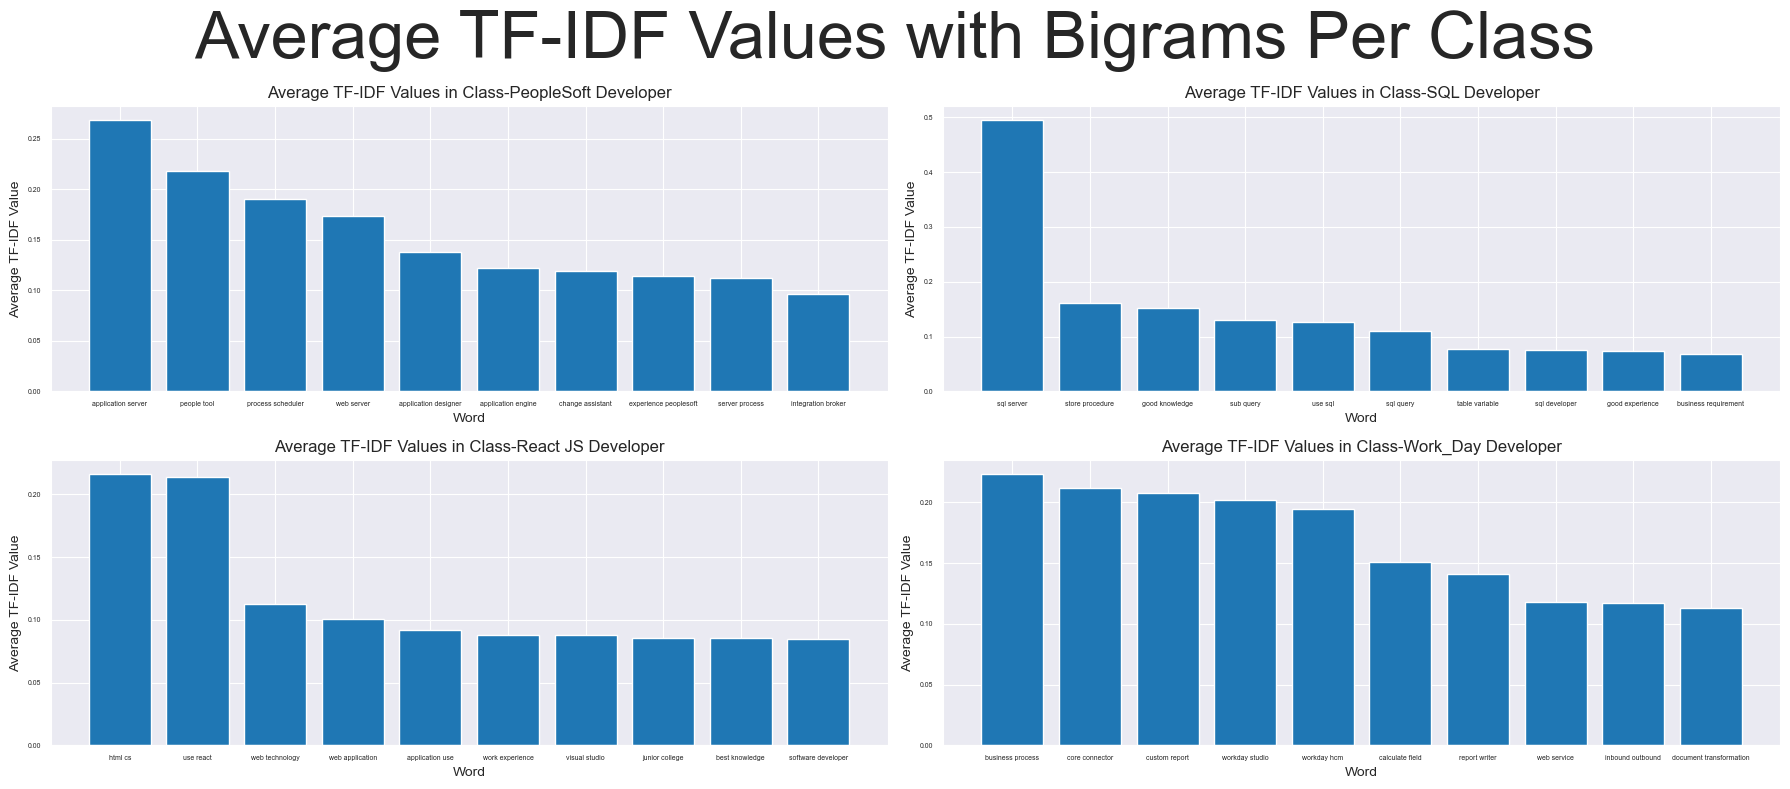

In [33]:
fig, axs = plt.subplots(2,2,figsize=(18,8))
fig.suptitle("Average TF-IDF Values with Bigrams Per Class",fontsize=48)
axs=axs.flatten()
for data,ax,col in zip(top_tf_idf_val,axs,y.unique()):
    words=data[0][:10]
    avg_tf_idf_value=data[1][:10]    
    rects1 = ax.bar(words, avg_tf_idf_value)
    ax.set_ylabel('Average TF-IDF Value')
    ax.set_xlabel("Word")
    ax.set_title('Average TF-IDF Values in Class-'+str(col))
fig.tight_layout()
plt.show()

-----------

From the above plots between the words and their tf-idf values for each category, we can see that the pairs of words occuring together for each class are distinct. The result is similar to that of the unigram case. But more can be found when the models are trained with this dataset.

Let us look at the plot of the PCA.

----

In [34]:
pca_values = pca.fit_transform(x_bi_tfidf)
pca_data = np.vstack((pca_values.T, y_enc)).T
pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2", "Label"))

<Axes: xlabel='Dim_1', ylabel='Dim_2'>

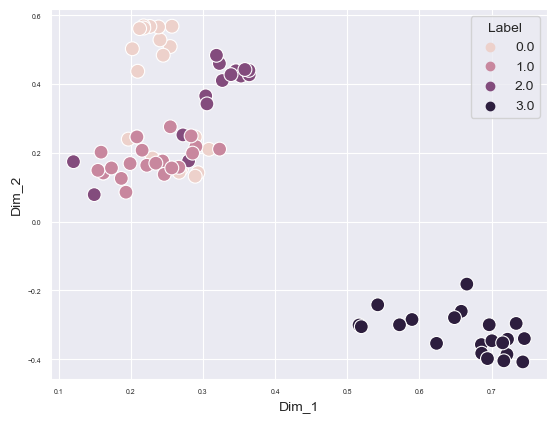

In [35]:
sns.scatterplot(data=pca_df,x='Dim_1',y='Dim_2',hue='Label',s = 100) 

----------------

The overlap of the two categories became much more intense in the bigram case.

Let us try with the trigram option.

### 1.3 Trigram TF-IDF

In [36]:
trigram_tfidf = TfidfVectorizer(min_df=10,max_features=None,ngram_range=(3,3),stop_words='english')

In [37]:
x_tri_tfidf = trigram_tfidf.fit_transform(x)

In [38]:
x_tri_tfidf_df = pd.DataFrame(x_tri_tfidf.toarray())
x_tri_tfidf_df.columns = trigram_tfidf.get_feature_names_out()

In [39]:
x_tri_tfidf_df

,application server process,business process security,code report lower,core connector worker,create custom report,day day support,day support workday,declaration declare information,eib core connector,experience currently work,...,true best knowledge,use application designer,use object transporter,use report writer,use workday studio,work experience work,work workday consultant,workday report writer,xslt code report,year experience peoplesoft
0,0.435804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.389234,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.148054,0.200462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.510296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.262811
3,0.160998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.165834,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.628634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.323757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.000000,0.000000,0.183918,0.189442,0.174132,0.174132,0.174132,0.000000,0.000000,0.0,...,0.000000,0.000000,0.189442,0.183918,0.174132,0.000000,0.000000,0.378884,0.178837,0.000000
75,0.000000,0.208736,0.000000,0.000000,0.191867,0.191867,0.191867,0.000000,0.187041,0.0,...,0.000000,0.000000,0.000000,0.202650,0.191867,0.208736,0.208736,0.000000,0.197051,0.000000
76,0.000000,0.155528,0.150993,0.311055,0.000000,0.000000,0.000000,0.000000,0.278726,0.0,...,0.000000,0.000000,0.311055,0.000000,0.285918,0.000000,0.155528,0.155528,0.146821,0.000000
77,0.000000,0.165504,0.160678,0.000000,0.152129,0.152129,0.152129,0.000000,0.148302,0.0,...,0.000000,0.000000,0.000000,0.160678,0.000000,0.000000,0.000000,0.000000,0.156239,0.000000


In [40]:
x_tri_tfidf_df.to_csv('encoded_tri_tfidf.csv', index = False)

----------

Getting the top tf-idf values per class

-----

In [41]:
top_tf_idf_val=[]
for col in y.unique():
    index=y[y == val].index
    filtered_data=x.loc[index]
    vec_data=trigram_tfidf.transform(filtered_data)
    vec_data=vec_data.A

    #finding the indices of top TF-IDF values across the output

    indices=np.dstack(np.unravel_index(np.argsort(vec_data.ravel()), vec_data.shape))[0][::-1]
    feat=trigram_tfidf.get_feature_names_out()
    avg_tf_idf_scores=dict()

    for index in indices:
        if feat[index[1]] in avg_tf_idf_scores:
            value=avg_tf_idf_scores[feat[index[1]]]
            value.append(vec_data[index[0]][index[1]])
            avg_tf_idf_scores[feat[index[1]]]=value
        else:
            avg_tf_idf_scores[feat[index[1]]]=[vec_data[index[0]][index[1]]]

    # TF-IDF value is not same for the same word. as it is depends on 
    #TF value and IDF value
    #TF value will change based on the input. so finding average TF-IDF value

    for key in avg_tf_idf_scores:

        value=np.array(avg_tf_idf_scores[key])
        avg_tf_idf_scores[key]= np.mean(value)

    avg_tf_idf_scores={k: v for k, v in sorted(avg_tf_idf_scores.items(),
                                    key=lambda item: item[1],reverse=True)}

    top_tf_idf_val.append((list(avg_tf_idf_scores.keys()),list(avg_tf_idf_scores.values())))

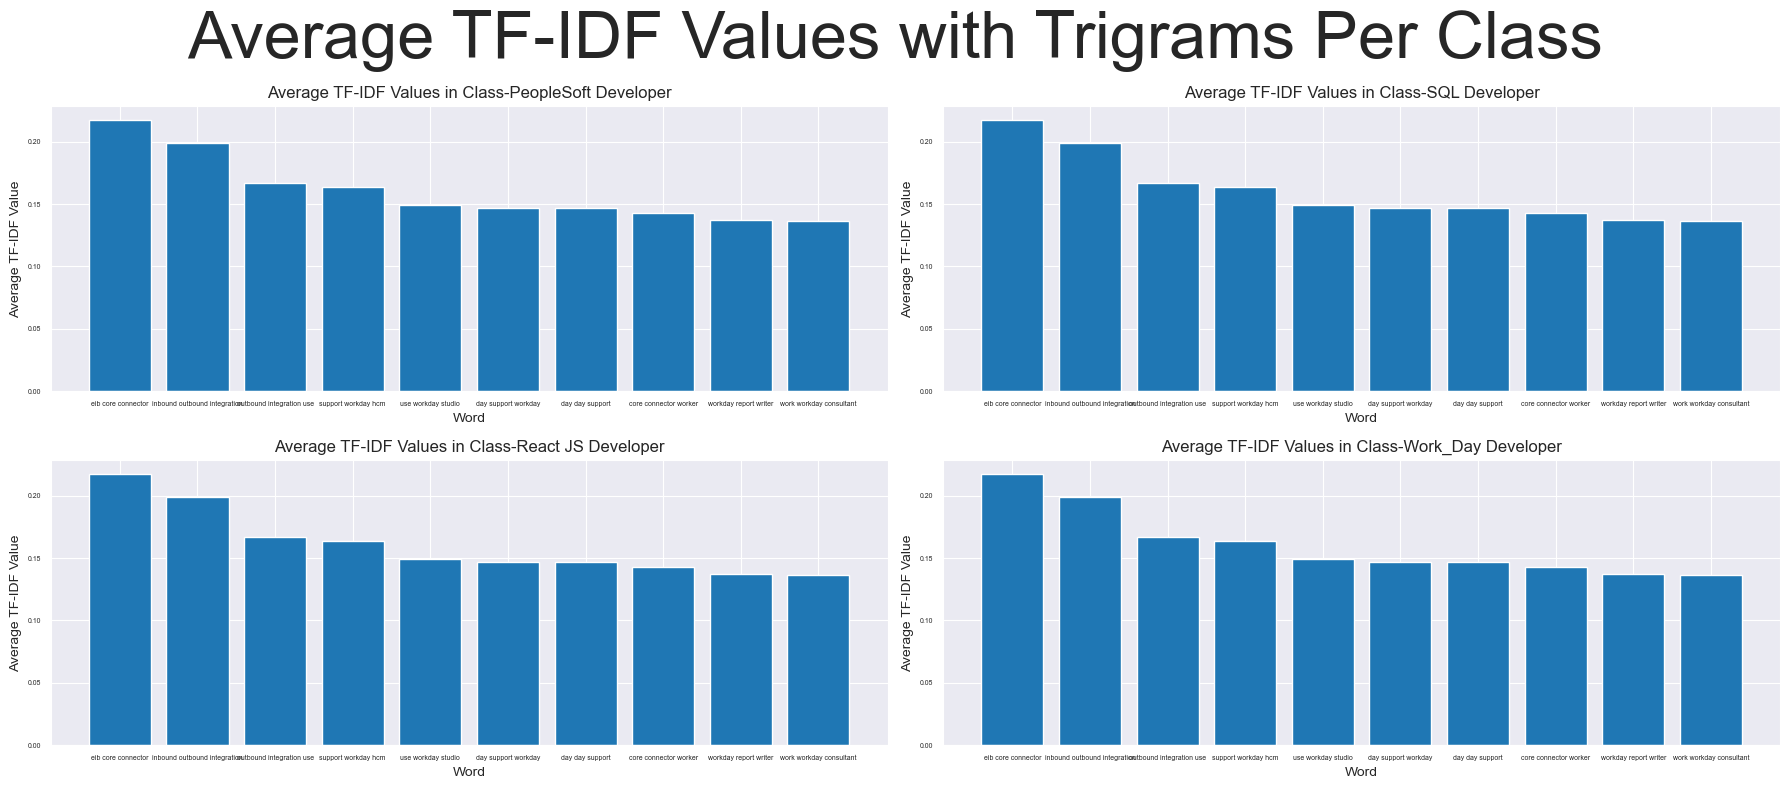

In [42]:
fig, axs = plt.subplots(2,2,figsize=(18,8))
fig.suptitle("Average TF-IDF Values with Trigrams Per Class",fontsize=48)
axs=axs.flatten()
for data,ax,col in zip(top_tf_idf_val,axs,y.unique()):
    words=data[0][:10]
    avg_tf_idf_value=data[1][:10]    
    rects1 = ax.bar(words, avg_tf_idf_value)
    ax.set_ylabel('Average TF-IDF Value')
    ax.set_xlabel("Word")
    ax.set_title('Average TF-IDF Values in Class-'+str(col))
fig.tight_layout()
plt.show()

-----------

From the above plots between the words and their tf-idf values for each category, we can see that the number of three word phrases repeating in all the categories have increase a bit from the bigram case. The results in this case are poor as all the 4 categories are showing the same combinations of words.

Let us look at the plot of the PCA.

----

In [43]:
pca_values = pca.fit_transform(x_tri_tfidf)
pca_data = np.vstack((pca_values.T, y_enc)).T
pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2", "Label"))

<Axes: xlabel='Dim_1', ylabel='Dim_2'>

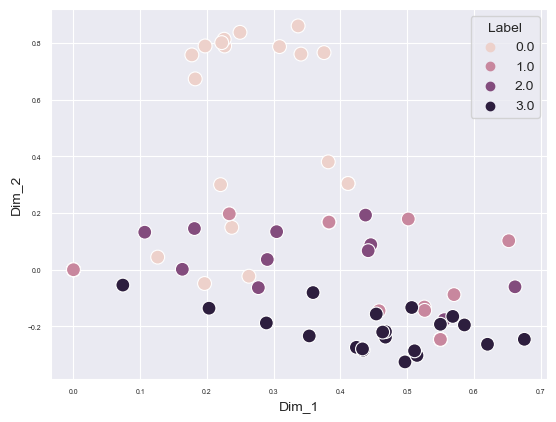

In [44]:
sns.scatterplot(data=pca_df,x='Dim_1',y='Dim_2',hue='Label',s = 100) 

### 1.4 Uni-Bigrams TF-IDF

In [45]:
unibigram_tfidf = TfidfVectorizer(min_df=10,max_features=None,ngram_range=(1,2),stop_words='english')

In [46]:
x_unibi_tfidf = unibigram_tfidf.fit_transform(x)

In [47]:
x_unibi_tfidf_df = pd.DataFrame(x_unibi_tfidf.toarray())
x_unibi_tfidf_df.columns = unibigram_tfidf.get_feature_names_out()

In [48]:
x_unibi_tfidf_df

,ability,ability work,absence,academic,access,accord,account,achieve,achievement,active,...,worker,workflow,write,writer,xml,xml xslt,xslt,xslt code,year,year experience
0,0.000000,0.000000,0.000000,0.0,0.083208,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.027142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.025264,0.00000,0.000000,...,0.000000,0.049198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009789,0.013364
2,0.000000,0.000000,0.000000,0.0,0.025601,0.000000,0.000000,0.000000,0.00000,0.028571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010451,0.014268
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.099959,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012188,0.016639
4,0.027972,0.000000,0.000000,0.0,0.039031,0.000000,0.000000,0.000000,0.04112,0.043559,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031867,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.014400,0.020094,0.043542,0.0,0.080376,0.065313,0.051648,0.000000,0.00000,0.000000,...,0.091588,0.000000,0.026218,0.105393,0.065021,0.038307,0.091588,0.021169,0.016406,0.000000
75,0.016679,0.000000,0.176514,0.0,0.046548,0.000000,0.000000,0.000000,0.02452,0.000000,...,0.000000,0.000000,0.015183,0.040691,0.075312,0.044369,0.063650,0.024520,0.028503,0.012971
76,0.000000,0.000000,0.019352,0.0,0.017862,0.000000,0.015303,0.000000,0.00000,0.000000,...,0.048848,0.000000,0.000000,0.046843,0.086697,0.034051,0.081414,0.056453,0.007292,0.009954
77,0.017331,0.000000,0.052404,0.0,0.024184,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.022046,0.000000,0.015777,0.063422,0.078255,0.046103,0.088183,0.025478,0.019744,0.026955


In [49]:
x_unibi_tfidf_df.to_csv('encoded_unibi_tfidf.csv', index = False)

----------

Getting the top tf-idf values per class

-----

In [69]:
top_tf_idf_val=[]
for col in y.unique():
    index=y[y == val].index
    filtered_data=x.loc[index]
    vec_data=unibigram_tfidf.transform(filtered_data)
    vec_data=vec_data.A

    #finding the indices of top TF-IDF values across the output

    indices=np.dstack(np.unravel_index(np.argsort(vec_data.ravel()), vec_data.shape))[0][::-1]
    feat=unibigram_tfidf.get_feature_names_out()
    avg_tf_idf_scores=dict()

    for index in indices:
        if feat[index[1]] in avg_tf_idf_scores:
            value=avg_tf_idf_scores[feat[index[1]]]
            value.append(vec_data[index[0]][index[1]])
            avg_tf_idf_scores[feat[index[1]]]=value
        else:
            avg_tf_idf_scores[feat[index[1]]]=[vec_data[index[0]][index[1]]]

    # TF-IDF value is not same for the same word. as it is depends on 
    #TF value and IDF value
    #TF value will change based on the input. so finding average TF-IDF value

    for key in avg_tf_idf_scores:

        value=np.array(avg_tf_idf_scores[key])
        avg_tf_idf_scores[key]= np.mean(value)

    avg_tf_idf_scores={k: v for k, v in sorted(avg_tf_idf_scores.items(),
                                    key=lambda item: item[1],reverse=True)}

    top_tf_idf_val.append((list(avg_tf_idf_scores.keys()),list(avg_tf_idf_scores.values())))

In [75]:
'sql' in top_tf_idf_val[1][0]

True

In [76]:
top_tf_idf_val[1][0].index('sql')

385

In [81]:
len(top_tf_idf_val[1][0])

650

In [82]:
unibi_df = pd.DataFrame(top_tf_idf_val)
unibi_df

,0,1
0,"[workday, report, integration, eib, connector,...","[0.43771109121926444, 0.21689679128548664, 0.2..."
1,"[workday, report, integration, eib, connector,...","[0.43771109121926444, 0.21689679128548664, 0.2..."
2,"[workday, report, integration, eib, connector,...","[0.43771109121926444, 0.21689679128548664, 0.2..."
3,"[workday, report, integration, eib, connector,...","[0.43771109121926444, 0.21689679128548664, 0.2..."


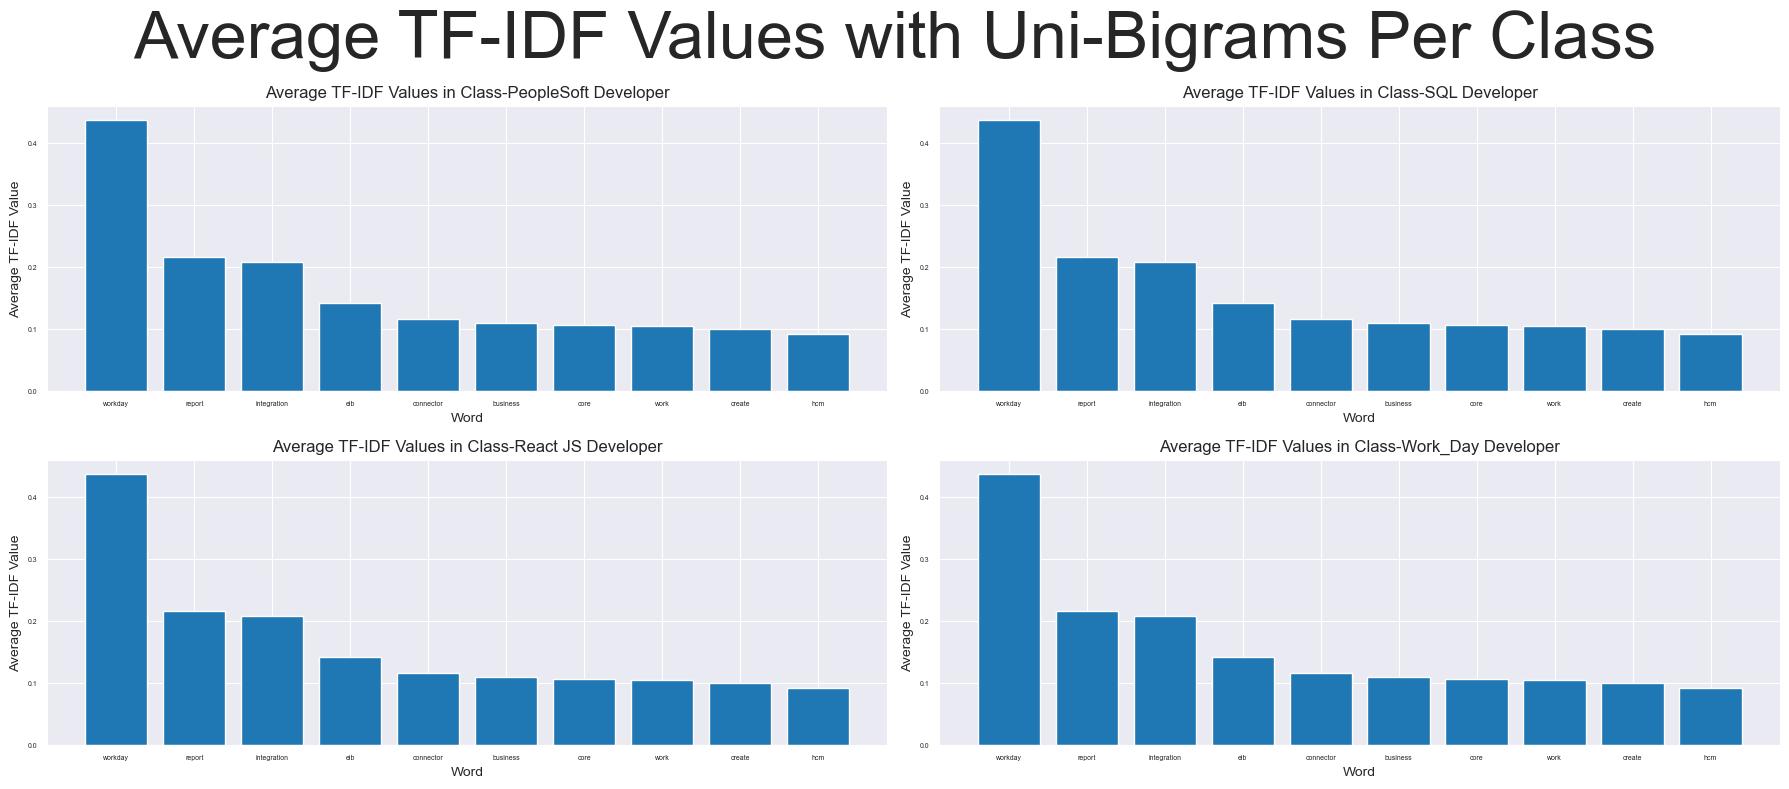

In [70]:
fig, axs = plt.subplots(2,2,figsize=(18,8))
fig.suptitle("Average TF-IDF Values with Uni-Bigrams Per Class",fontsize=48)
axs=axs.flatten()
for data,ax,col in zip(top_tf_idf_val,axs,y.unique()):
    words=data[0][:10]
    avg_tf_idf_value=data[1][:10]    
    rects1 = ax.bar(words, avg_tf_idf_value)
    ax.set_ylabel('Average TF-IDF Value')
    ax.set_xlabel("Word")
    ax.set_title('Average TF-IDF Values in Class-'+str(col))
fig.tight_layout()
plt.show()

-----------

From the above plots between the words and their tf-idf values for each category, we can see that the number of three word phrases repeating in all the categories have increase a bit from the bigram case.

Let us look at the plot of the PCA.

----

In [52]:
pca_values = pca.fit_transform(x_unibi_tfidf)
pca_data = np.vstack((pca_values.T, y_enc)).T
pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2", "Label"))

<Axes: xlabel='Dim_1', ylabel='Dim_2'>

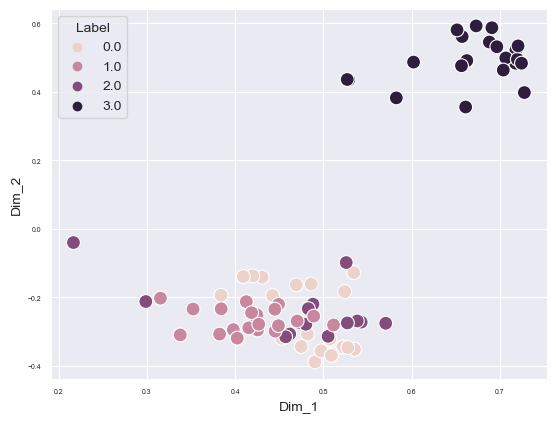

In [53]:
sns.scatterplot(data=pca_df,x='Dim_1',y='Dim_2',hue='Label',s = 100) 

----------------

Here the partitions is similar to that of the unigrams case. There is clearly negligible difference between the unigram and the uni-bigram cases.

### 2. TF-IDF weighted average Word2Vec

In [54]:
tf_idf_w2v = TfidfVectorizer(min_df=10,ngram_range=(1,1),stop_words='english',use_idf=True)
tf_idf_w2v.fit(x.values)
tfidf_dict = dict(zip(tf_idf_w2v.get_feature_names_out(), list(tf_idf_w2v.idf_)))
tfidf_words = set(tf_idf_w2v.get_feature_names_out())

In [55]:
def comp_tfidf_weighted_w2v(data,w2v_words,tfidf_words,w2v_dict,tfidf_dict):
    tfidf_w2v = []
    for sentence in data:
        vector = np.zeros(300) 
        # as word vectors are of zero length
        tf_idf_weight =0;
        # num of words with a valid vector in the sentence/review
        for word in sentence.split(): 
            # for each word in a review/sentence
            if (word in w2v_words) and (word in tfidf_words):
                vec = w2v_dict[word] 
                # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and 
                #the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = tfidf_dict[word]*(sentence.count(word)/len(sentence.split()))
                # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v.append(vector)
    return np.array(tfidf_w2v)

In [56]:
x_tfidf_w2v=comp_tfidf_weighted_w2v(x.values,w2v_words,tfidf_words,w2v_dict,tfidf_dict)

In [57]:
x_tfidf_w2v.shape

(79, 300)

-------------

Applying pca on the word2vec data

-----

In [58]:
pca_values = pca.fit_transform(x_tfidf_w2v)
pca_data = np.vstack((pca_values.T, y_enc)).T
pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2", "Label"))

<Axes: xlabel='Dim_1', ylabel='Dim_2'>

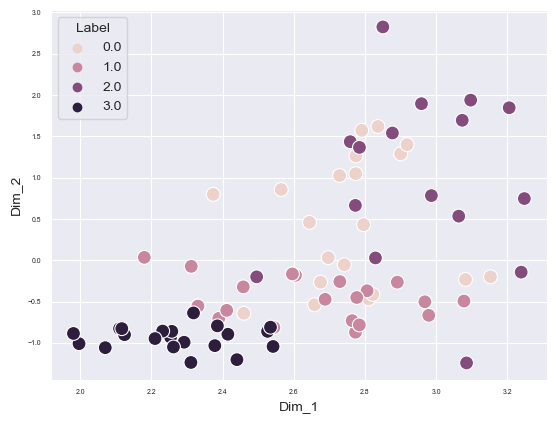

In [59]:
sns.scatterplot(data=pca_df,x='Dim_1',y='Dim_2',hue='Label',s = 100) 

------

Among all the vectorizations **the unigram TF-IDF and the uni-bigram TF-IDF** are giving some promising results. But we can find more of this when we train the models with all the different vectorized datasets.

-------

In [60]:
x_tfidf_w2v_df = pd.DataFrame(x_tfidf_w2v)
x_tfidf_w2v_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.249856,-0.050854,0.030935,-0.351382,0.033219,-0.058349,0.110248,0.018460,0.173916,-1.007023,...,0.115080,-0.176572,-0.166385,-0.121687,-0.047989,0.114495,-0.194525,-0.139248,-0.004480,-0.014844
1,-0.164160,-0.035786,-0.014735,-0.271354,0.037697,-0.126913,0.152547,0.029490,0.193237,-0.932266,...,0.104443,-0.258246,-0.086179,-0.097104,-0.052362,0.049070,-0.207569,-0.124764,-0.065387,-0.083582
2,-0.326452,0.057538,0.047241,-0.338644,0.064403,-0.074655,0.088644,0.020399,0.222410,-0.968301,...,0.228973,-0.075547,-0.277537,-0.185737,0.030159,0.111392,-0.253248,-0.191022,0.047089,-0.013120
3,-0.312744,0.138061,0.069614,-0.257651,0.019416,-0.007842,-0.008854,0.107746,0.049465,-1.243163,...,0.056566,-0.183118,-0.222640,-0.140086,0.117841,0.151648,-0.240118,-0.092160,0.019501,-0.006918
4,-0.180472,0.022471,0.017628,-0.297219,0.066435,-0.123548,0.097502,0.011459,0.130353,-1.147019,...,0.084755,-0.260095,-0.152116,-0.058447,0.044366,0.196300,-0.192696,-0.229484,-0.092048,-0.044315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,-0.102191,0.115240,-0.027630,-0.103343,-0.063028,-0.095374,-0.146780,-0.027789,-0.044502,-1.186737,...,-0.132021,-0.185583,-0.163717,-0.028595,0.199349,0.149589,-0.098094,-0.062192,-0.082358,-0.049935
75,-0.162085,0.117216,0.006409,-0.094791,-0.059341,-0.098274,-0.070544,0.086802,-0.041733,-1.106633,...,-0.055869,-0.121071,-0.218986,-0.026049,0.161787,0.130823,-0.116558,-0.086333,-0.100589,-0.036281
76,-0.236896,0.136646,-0.062693,-0.059210,-0.098569,-0.098378,-0.153881,0.056844,-0.041303,-1.102772,...,-0.066631,-0.194528,-0.245374,-0.024017,0.205593,-0.006095,-0.065380,-0.068579,-0.092479,-0.010701
77,-0.194023,0.099164,-0.011265,-0.015472,-0.036116,-0.114212,-0.086774,0.090555,-0.063999,-0.985517,...,-0.067504,-0.106864,-0.243503,-0.022267,0.199015,0.075564,-0.146144,-0.050653,-0.140483,-0.061457


In [61]:
x_tfidf_w2v_df.to_csv('encoded_text_w2v.csv', index = False)

In [62]:
y

0     PeopleSoft Developer
1     PeopleSoft Developer
2     PeopleSoft Developer
3     PeopleSoft Developer
4     PeopleSoft Developer
              ...         
74      Work_Day Developer
75      Work_Day Developer
76      Work_Day Developer
77      Work_Day Developer
78      Work_Day Developer
Name: Category, Length: 79, dtype: object

In [63]:
y.to_csv('targets.csv')

------------------

All the vectorized datasets are saved into csv files, so that they can be used while building the models.

The next step will be the model building.

In [64]:
joblib.dump(tfidf_dict,'tfidf_dict.pkl')
joblib.dump(tfidf_words,'tfidf_words.pkl')
joblib.dump(w2v_dict,'w2v_dict.pkl')
joblib.dump(w2v_words,'w2v_words.pkl')

['w2v_words.pkl']

In [65]:
joblib.dump(unigram_tfidf, 'unigram_tfidf.pkl')

['unigram_tfidf.pkl']

In [66]:
joblib.dump(bigram_tfidf, 'bigram_tfidf.pkl')

['bigram_tfidf.pkl']

In [67]:
joblib.dump(trigram_tfidf, 'trigram_tfidf.pkl')

['trigram_tfidf.pkl']

In [68]:
joblib.dump(unigram_tfidf, 'unibigram_tfidf.pkl')

['unibigram_tfidf.pkl']